In [1]:
import numpy as np

### Python list to Numpy Array

In [2]:
lst = [0, 1, 2, 3, 4]
print(type(lst))
lst = np.array(lst)
print(type(lst))

<class 'list'>
<class 'numpy.ndarray'>


### Load external .npy file

In [3]:
lst = np.load('sudoku_game.npy')
print(lst)

[[0 0 5 0 0 9 0 0 1]
 [0 7 0 0 6 0 0 4 3]
 [0 0 6 0 0 2 0 8 7]
 [1 9 0 0 0 7 4 0 0]
 [0 5 0 0 8 3 0 0 0]
 [6 0 0 0 0 0 1 0 5]
 [0 0 3 5 0 8 6 9 0]
 [0 4 2 9 1 0 3 0 0]]


### Array of Zeros

In [4]:
zeros = np.zeros((4, 3))
print(zeros)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### Array of Random Floats

In [5]:
np.random.seed(10)
floats = np.random.rand(3, 2)
print(floats)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]]


### Range Array

In [6]:
ran = np.arange(0, 10, 2) # excluding 10, third argument is step
print(ran)

[0 2 4 6 8]


## 3D Arrays

![](array_3d.PNG)

In [7]:
arr_1 = np.array([[1, 2], [5, 7]])
arr_2 = np.array([[8, 9], [5, 7]])
arr_3 = np.array([[1, 2], [5, 7]])

arr_3d = np.array([arr_1, arr_2, arr_3])
print(arr_3d)
arr_1.shape, arr_3d.shape

[[[1 2]
  [5 7]]

 [[8 9]
  [5 7]]

 [[1 2]
  [5 7]]]


((2, 2), (3, 2, 2))

## 4D Arrays

![](array_4d.PNG)

In [18]:
arr_4d = np.array([arr_3d, arr_3d, arr_3d, 
                   arr_3d, arr_3d, arr_3d, 
                   arr_3d, arr_3d, arr_3d])
print(arr_4d)
arr_4d.shape

[[[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]


 [[[1 2]
   [5 7]]

  [[8 9]
   [5 7]]

  [[1 2]
   [5 7]]]]


(9, 3, 2, 2)

## Array Dimensionality

Vector - A one dimensional array<br>
Matrix - A two dimensional array<br>
Tensor - A three or more dimensional array

### Array .shape, .reshape(), .flatten()

In [22]:
game = np.load('sudoku_game.npy')
soln = np.load('sudoku_solution.npy')

both = np.array([game, soln])

new_game = np.array([game, soln])
new_both = np.array([both, new_game])
print(new_both.shape)

(2, 2, 8, 9)


In [23]:
flatten = soln.flatten()
print(flatten.shape)

reshaped_game = flatten.reshape(9, 8)
print(reshaped_game)

(72,)
[[3 2 5 8 4 9 7 6]
 [1 9 7 1 2 6 5 8]
 [4 3 4 3 6 1 9 2]
 [5 8 7 1 9 8 6 5]
 [7 4 3 2 2 5 7 4]
 [8 3 9 1 6 6 8 9]
 [7 3 4 1 2 5 7 1]
 [3 5 2 8 6 9 4 5]
 [4 2 9 1 6 3 7 8]]


## Numpy Datatypes

In [24]:
print(game.dtype)

int64


In [25]:
# Optimizing because game has values only from 0 to 9 so there is no point in saving the data in np.int64
game = game.astype(np.int8)
print(game.dtype)

int8


## Filtering Arrays

1. Masks and fancy indexing:<br>
        A mask checks whether a condition is true for each element in an array.
        
### Filtering with fancy indexing
```
one_to_five = np.arange(1, 6)
mask = one_to_five % 2 == 0
one_to_five[mask]

OUTPUT: array([2, 4])
```

### 2D fancy indexing
```
Q) Find which class ids (indexes) have even number of students?

classroom_ids_and_sizes = np.array([[1, 22], [2, 21], [3, 27], [4, 26]])
classroom_ids_and_sizes[:, 0][classroom_ids_and_sizes[:, 1] % 2 == 0]

OUTPUT: array([1, 4])
```

### Fancy indexing vs. np.where()

- Fancy indexing: Returns array of elements
- np.where(): Returns array of indices, can create an array based on whether elements do or don't meet condition

### Filtering with np.where()

```
np.where(classroom_ids_and_sizes[:, 1] % 2 == 0)
OUTPUT: (array([0, 3]), ) # Returns a tuple
```

In [26]:
row_ind, col_ind = np.where(game == 0)
row_ind, col_ind

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4,
        4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
       dtype=int64),
 array([0, 1, 3, 4, 6, 7, 0, 2, 3, 5, 6, 0, 1, 3, 4, 6, 2, 3, 4, 7, 8, 0,
        2, 3, 6, 7, 8, 1, 2, 3, 4, 5, 7, 0, 1, 4, 8, 0, 5, 7, 8],
       dtype=int64))

In [29]:
# Find and replace
game = np.where(game == 0, '', game)
game

C:\Users\Muhammad Iqbal\AppData\Local\Temp\ipykernel_5604\2650188646.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  game = np.where(game == 0, '', game)


array([['', '', '5', '', '', '9', '', '', '1'],
       ['', '7', '', '', '6', '', '', '4', '3'],
       ['', '', '6', '', '', '2', '', '8', '7'],
       ['1', '9', '', '', '', '7', '4', '', ''],
       ['', '5', '', '', '8', '3', '', '', ''],
       ['6', '', '', '', '', '', '1', '', '5'],
       ['', '', '3', '5', '', '8', '6', '9', ''],
       ['', '4', '2', '9', '1', '', '3', '', '']], dtype='<U4')

In [30]:
# tree_census exercise

tc = np.load('tree_census.npy')

# c1: index, c2: block_id, c3: tree_trunk_diameter, c4: tree_stump_diameter
largest_tree_data = tc[tc[:, 2] == 51]
print("Largest Tree Data: ", largest_tree_data)
largest_tree_block_id = largest_tree_data[:, 1]
print("ID of Largest Tree: ", largest_tree_block_id)
trees_on_largest_tree_block = tc[tc[:, 1] == largest_tree_block_id]
print("Trees with block no 501882: ", trees_on_largest_tree_block)

Largest Tree Data:  [[    61 501882     51      0]]
ID of Largest Tree:  [501882]
Trees with block no 501882:  [[    60 501882      8      0]
 [    61 501882     51      0]
 [    62 501882      7      0]
 [    63 501882      4      0]
 [    64 501882     15      0]
 [    65 501882      3      0]
 [    66 501882      8      0]
 [    67 501882      6      0]
 [    68 501882      6      0]
 [    69 501882      3      0]]


In [31]:
# Data for trees with block_id of 313879 using fancy indexing

block_313879 = tc[tc[:, 1] == 313879]
print(block_313879)
row_indices = np.where(tc[:, 1] == 313879)
print(row_indices)
block_313879 = tc[row_indices]
print(block_313879)

[[  1115 313879      3      0]
 [  1116 313879     17      0]]
(array([921, 922], dtype=int64),)
[[  1115 313879      3      0]
 [  1116 313879     17      0]]


In [32]:
# Replace tree's trunk diameter with its stump

trunk_stump_diameters = np.where(tc[:, 2] == 0, tc[:, 3], tc[:, 2])
print(trunk_stump_diameters)

[24 20  3  3  4  4  4  4  4  3  3  4  2  2  3  4  4  4  3 14  3  4  7  8
  7  8  7  5  6  5  5 17 31 19 21 18  4  5  3  4  3  4 13 13 13  5  4  4
  4 11  5  4  5  8 51  7  4 15  3  8  6  6  3  4  3  2  3  3  6  5  5  5
  5  9  4  4  7  7  6  5  4  4  5  5  5  7  3  5  3  3  6  6  8  7  4  5
  4  4  4  4  6  5  3  4 12 12 12  5  6  6  6  6  6  5  5  6  7  7 25  5
  5  4  6  6  7 11  6 17 13 14 14 20 15 13  7  7 10 17 14  4  6  7  8  7
  7  6  7  5  2  2  2  2 26 25  2 15  6 20  5  9 15 13 15  3  2 13  6 12
 15 18 22 18 18 15 17  7  3  7  8  4 12 11 12  3  9 12 11 10  8  6  6  7
  7  3 15 12 12  4  5  5  5  4  4  5  4  9  2  4  4  6  5  5  2  5  5  4
  4  5  5  6 11  4  5  7  3 14 11 10  7 15 10  5  6 10 10  6  5  4  4  3
  5  4 14 12 11  8 14 12  9 12 11  7  8 10 10 12 11 12  5  5  6  9  9  8
  5  5  5  6  6 12 12 11 12  8  9  5  5  5  8  2  2  2 14 18 14 14 22 15
 19 14 18  7  7  7  8  8  5 10 14  2  2  2  2 11 12 12  3  3  3  3  3  6
  6  8  2  2 11 11 11  9 11 12 13  9 11  6  4  5  5

## Adding and Removing data: np.concatenate(), np.delete()

![](compatibility.PNG)

### Adding rows

In [33]:
new_trees = tc
print(tc.shape, new_trees.shape)

(1000, 4) (1000, 4)


In [34]:
updated_tc = np.concatenate((tc, tc))
print(updated_tc.shape)

(2000, 4)


### Adding Columns

In [35]:
new_trunks = tc[:, 2] * 2 # slicing the 3 column from tc
print(new_trunks.shape)

new_trunks = new_trunks.reshape((1000, 1)) # reshaping the new_trunks because new_trees and new_trunks have different dimensions
print(new_trunks.shape)

new_tc_updated = np.concatenate((new_trees, new_trunks), axis=1) # axis=1 when adding a new column
print(new_tc_updated.shape)

(1000,)
(1000, 1)
(1000, 5)


### Deleting

In [36]:
# Deleting the old trunk column from new_tc_updated

new_tc_updated = np.delete(new_tc_updated, 2, axis=1)
print(new_tc_updated.shape)

(1000, 4)


In [38]:
# Deleting the block 313879 entries
 
block_313879 = np.where(tc[:, 1] == 313879)
new_tc_updated = np.delete(new_tc_updated, block_313879, axis=0)
print(new_tc_updated.shape)

(996, 4)


## Summarizing data

### Aggregating methods

- .sum()
- .min()
- .max()
- .mean()
- .cumsum()

In [39]:
sales = np.load('monthly_sales.npy')
print(sales)

# Months = rows
# Industries = columns

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]
 [ 4580 25637 10456]
 [ 5109 27995 11299]
 [ 5011 27419 10625]
 [ 5245 27305 10630]
 [ 5270 27760 11550]
 [ 4680 24988  9762]
 [ 4913 25802 10456]
 [ 5312 25405 13401]
 [ 6630 27797 18403]]


In [40]:
# Total sales by month

monthly_sales = sales.sum(axis=1, keepdims=True) # keepdims for keeping the original dimensions, 2D in this case
print(monthly_sales, '\n------------------------')

# Total sales by industry

ind_sales = sales.sum(axis=0, keepdims=True)
print(ind_sales)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]] 
------------------------
[[ 59673 315105 135026]]


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


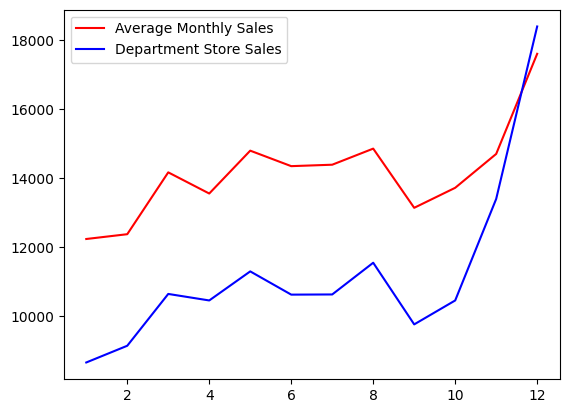

In [41]:
# Plotting averages

import matplotlib.pyplot as plt

avg_mon_sales = sales.mean(axis=1)
print(avg_mon_sales)

# average monthly sales
plt.plot(np.arange(1, 13), avg_mon_sales, c='r', label='Average Monthly Sales')
# Department store sales
plt.plot(np.arange(1, 13), sales[:, 2], c='b', label='Department Store Sales')
plt.legend()
plt.show()

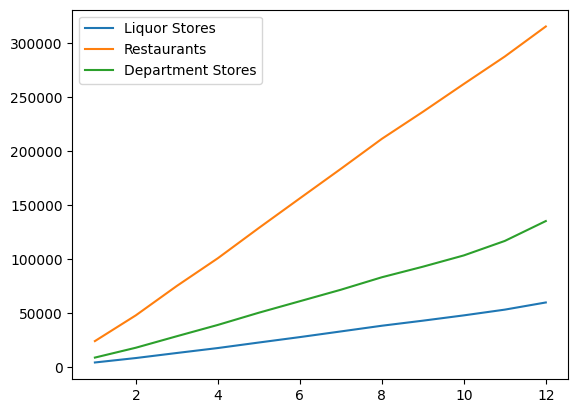

In [42]:
# Cumulative Sales

cumsum_sales = sales.cumsum(axis=0) # cumsum have keepdims=True by default

plt.plot(np.arange(1,13), cumsum_sales[:, 0], label='Liquor Stores')
plt.plot(np.arange(1,13), cumsum_sales[:, 1], label='Restaurants')
plt.plot(np.arange(1,13), cumsum_sales[:, 2], label='Department Stores')
plt.legend()
plt.show()

### Vectorized Operations


```python
vec = np.vectorize(function())
vec(array)
```

- We can use ```for``` loop to iterate over the entire numpy array and apply ```.upper()``` python function to capitalize the letters, but vectorized operations are faster and efficient than the loops.

In [43]:
bb = np.array([['Walter', 'Jesse'], ['White', 'Pinkman']])
upper_vec = np.vectorize(str.upper)
print(upper_vec(bb))

[['WALTER' 'JESSE']
 ['WHITE' 'PINKMAN']]


### Broadcasting

![](broadcasting.PNG)

#### Compatibility Rules

- Numpy compares sets of array dimensions from right to left
- Two dimensions are compatible when:
    - One of them has a length of one or
    - They are of equal lengths
- All dimensions sets must be compatible

![](compatibility_broadcast.PNG)

#### Broadcasting rows

![](row_broadcasting.PNG)

#### Broadcasting columns

![](column_broadcasting.PNG)
![](column_broadcasting2.PNG)

#### Example

![](example_broadcast.PNG)

In [44]:
# Broadcast across columns

monthly_growth_rate = [1.01, 1.03, 1.03, 1.02, 1.05, 1.03, 1.06, 1.04, 1.03, 1.04, 1.02, 1.01]
monthly_growth_1D = np.array(monthly_growth_rate)

monthly_growth_2D = monthly_growth_1D.reshape(12, 1)
print(sales * monthly_growth_2D)

[[ 4175.34 24164.25  8743.57]
 [ 4239.48 24591.25  9416.26]
 [ 4813.19 28012.91 10964.35]
 [ 4671.6  26149.74 10665.12]
 [ 5364.45 29394.75 11863.95]
 [ 5161.33 28241.57 10943.75]
 [ 5559.7  28943.3  11267.8 ]
 [ 5480.8  28870.4  12012.  ]
 [ 4820.4  25737.64 10054.86]
 [ 5109.52 26834.08 10874.24]
 [ 5418.24 25913.1  13669.02]
 [ 6696.3  28074.97 18587.03]]


[1.0775     1.00833333 0.99333333]
(12, 3) (3,)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]


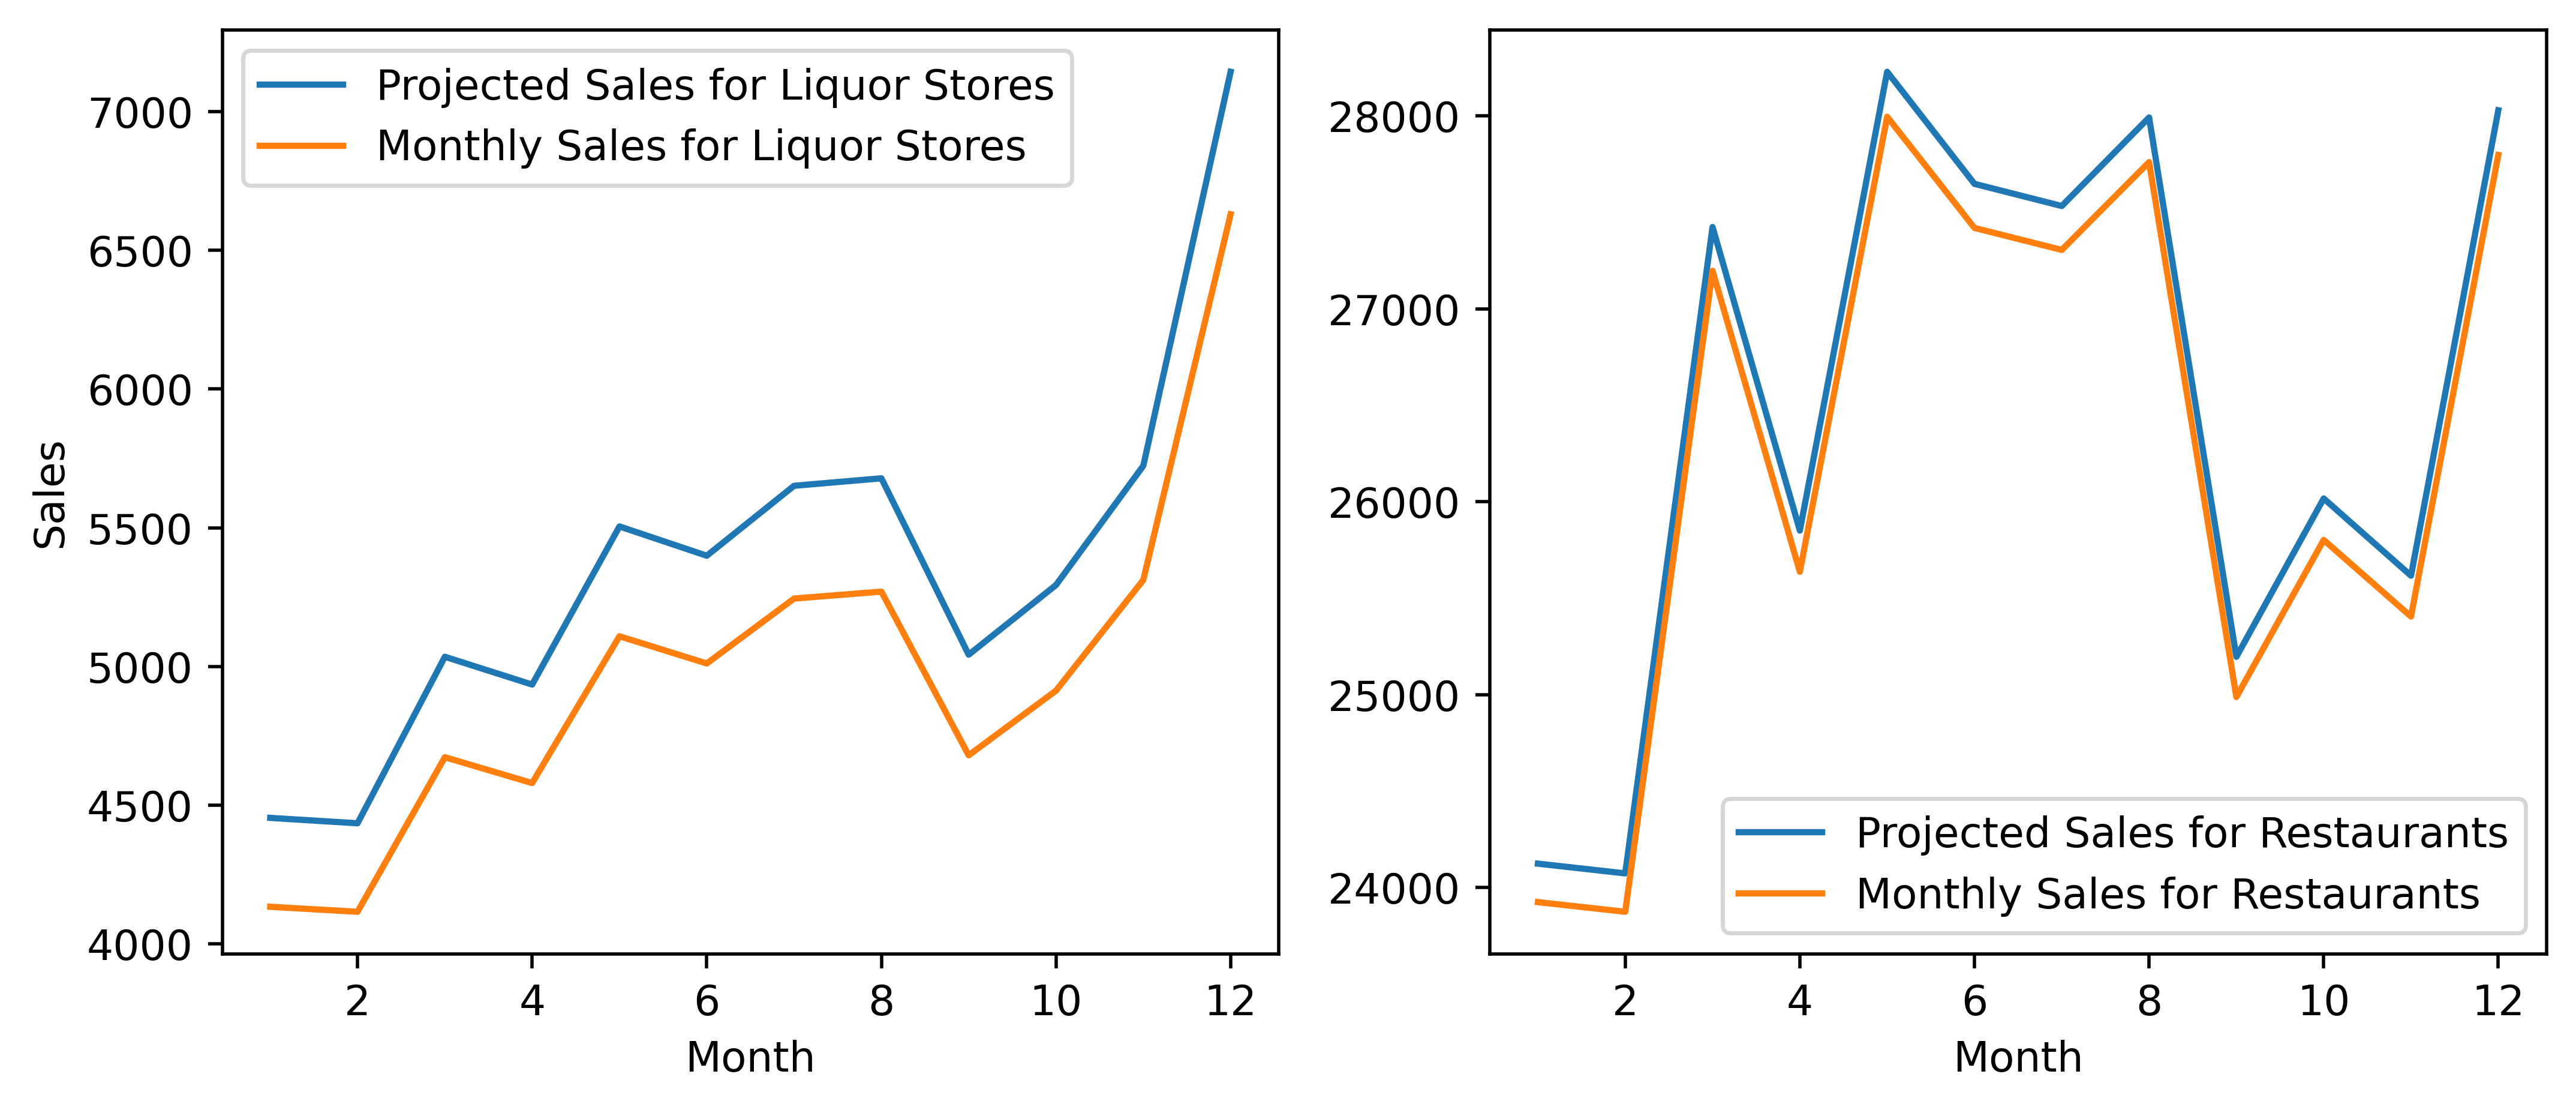

In [45]:
# Broadcast across rows

monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
                                       [1.  , 1.01, 0.97],
                                       [1.06, 1.03, 0.98],
                                       [1.08, 1.01, 0.98],
                                       [1.08, 0.98, 0.98],
                                       [1.1 , 0.99, 0.99],
                                       [1.12, 1.01, 1.  ],
                                       [1.1 , 1.02, 1.  ],
                                       [1.11, 1.01, 1.01],
                                       [1.08, 0.99, 0.97],
                                       [1.09, 1.  , 1.02],
                                       [1.13, 1.03, 1.02]])

mean_multipliers = monthly_industry_multipliers.mean(axis=0)
print(mean_multipliers)
print(sales.shape, mean_multipliers.shape)

projected_sales = sales * mean_multipliers
print(projected_sales)

fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, sharey=False, dpi=500)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales')
ax[0].plot(np.arange(1, 13), projected_sales[:, 0], label='Projected Sales for Liquor Stores')
ax[0].plot(np.arange(1, 13), sales[:, 0], label='Monthly Sales for Liquor Stores')
ax[0].legend(loc=0)
ax[1].set_xlabel('Month')
ax[1].plot(np.arange(1, 13), projected_sales[:, 1], label='Projected Sales for Restaurants')
ax[1].plot(np.arange(1, 13), sales[:, 1], label='Monthly Sales for Restaurants')
ax[1].legend(loc=0)
plt.show()

## Saving and Loading Arrays

### Loading .npy files

In [46]:
def show(arr):
    plt.imshow(arr)
    plt.show()

with open('rgb_array.npy', 'rb') as f:
    rgb_array = np.load(f)

print(rgb_array.shape)

(675, 843, 3)


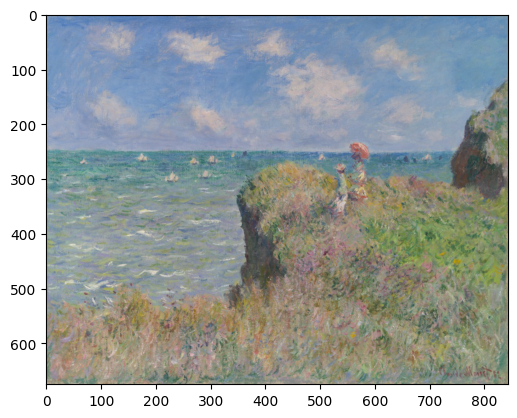

In [47]:
show(rgb_array)

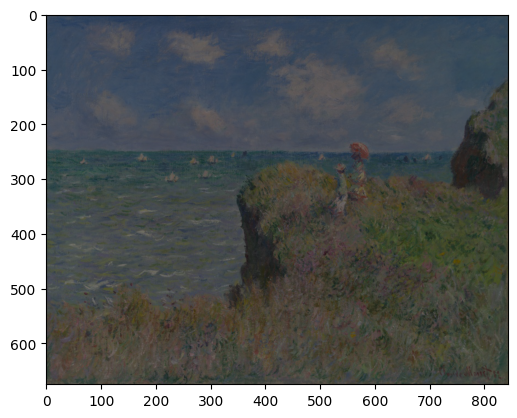

In [48]:
darker_image = rgb_array - (rgb_array * 0.5)
darker_image = darker_image.astype(dtype=np.int32)

show(darker_image)

### Saving the modified image to .npy file

In [49]:
with open('darker_image.npy', 'wb') as f:
    np.save(f, darker_image)

## Array Acrobatics: np.flip(), np.transpose()

### Augmenting Monet

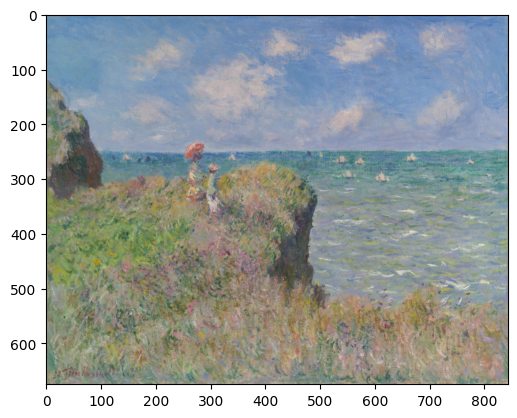

In [50]:
mirror = np.flip(rgb_array, axis=1)
show(mirror)

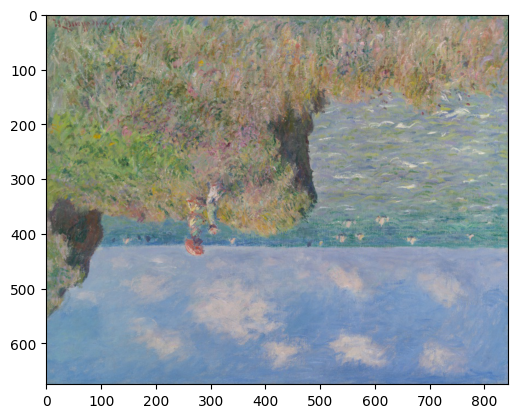

In [51]:
upside_down = np.flip(rgb_array, axis=(0, 1))
show(upside_down)

### Transposing

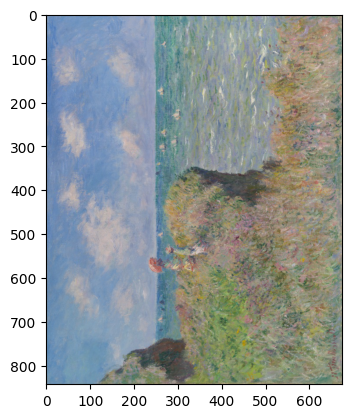

In [52]:
transpose = np.transpose(rgb_array, axes=(1, 0, 2)) # 90 Degree left
show(transpose)

## Stacking and Splitting

In [58]:
q1, q2, q3, q4 = np.split(sales, 4) # split monthly sales into four arrays of quarterly data across industries
print(q1)

quarterly_sales = np.stack([q1, q2, q3, q4])
print(quarterly_sales)
# sales.shape

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]
[[[ 4134 23925  8657]
  [ 4116 23875  9142]
  [ 4673 27197 10645]]

 [[ 4580 25637 10456]
  [ 5109 27995 11299]
  [ 5011 27419 10625]]

 [[ 5245 27305 10630]
  [ 5270 27760 11550]
  [ 4680 24988  9762]]

 [[ 4913 25802 10456]
  [ 5312 25405 13401]
  [ 6630 27797 18403]]]


### Splitting RGB data

(675, 843, 1)
(675, 843) (675, 843) (675, 843)


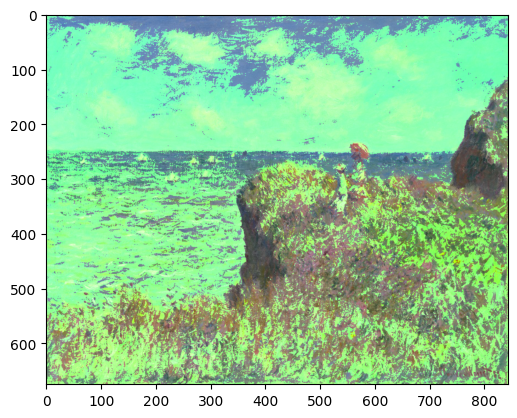

In [61]:
r, g, b = np.split(rgb_array, 3, axis=2)

# thresholding of green array
emp_g = np.where(g > g.mean(), 255, g)
print(emp_g.shape)

emp_g_2D = emp_g.reshape((675, 843))
r = r.reshape((675, 843))
b = b.reshape((675, 843))

print(emp_g_2D.shape, r.shape, b.shape)

emp_g_image = np.stack([r, emp_g_2D, b], axis=2)
show(emp_g_image)

## Reference 

Introduction to Numpy | Datacamp

# Practice

In [62]:
np.random.seed(42)
x = np.random.normal(size=(1, 74, 104, 1))
x.shape

(1, 74, 104, 1)

In [63]:
# x = np.squeeze(x)

In [64]:
print(x.shape)

(1, 74, 104, 1)


In [65]:
y = np.random.normal(size=(1, 74, 104, 1))
y.shape

(1, 74, 104, 1)

In [66]:
x.shape, y.shape

((1, 74, 104, 1), (1, 74, 104, 1))

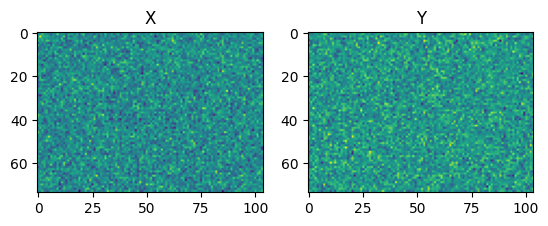

In [67]:
plt.subplot(121), plt.imshow(np.squeeze(x)),
plt.title('X')
plt.subplot(122), plt.imshow(np.squeeze(y)),
plt.title('Y')
plt.show()

In [68]:
# x = np.expand_dims(x, axis=0)
# x = np.expand_dims(x, axis=-1)
# x.shape
x = np.append(x, y, axis=0)

In [69]:
x.shape

(2, 74, 104, 1)

### Reference: Datacamp